# Clustering

In [3]:
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import numpy as np
import scipy.cluster.hierarchy as hier
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn import cluster, datasets, mixture
import sklearn_extra
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import scipy.cluster.hierarchy as shc
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import AgglomerativeClustering
import sklearn.cluster
import warnings
warnings.filterwarnings('ignore')
np.random.seed = 23

In [57]:
df = pd.read_csv('data/x_train.csv')

In [5]:
df.describe()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
count,22152.000000,22152.000000,22152.000000,22152.000000,22152.000000,22152.000000,22152.000000,22152.000000,22152.000000,22152.000000,...,22152.000000,22152.000000,22152.000000,22152.000000,22152.000000,22152.000000,22152.000000,22152.000000,22152.000000,22152.000000
mean,0.297385,0.017831,0.105766,0.556022,0.160347,0.492494,0.467350,0.159173,0.083092,0.096453,...,0.283631,0.151950,0.513678,0.294962,0.039410,0.649196,0.064103,0.105273,0.040132,0.033676
std,0.138661,0.132341,0.108254,0.496863,0.366936,0.277320,0.217746,0.149147,0.127125,0.236212,...,0.450770,0.358981,0.499824,0.456036,0.194572,0.477232,0.244941,0.306911,0.196273,0.180399
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.194805,0.000000,0.047909,0.000000,0.000000,0.233333,0.363636,0.063033,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.272727,0.000000,0.066568,1.000000,0.000000,0.500000,0.454545,0.112278,0.050000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.389610,0.000000,0.113536,1.000000,0.000000,0.666667,0.636364,0.202232,0.100000,0.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
df.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
0,0.467532,0.0,0.091908,0.0,0.0,0.833333,0.636364,0.221274,0.15,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.272727,0.0,0.044147,0.0,0.0,0.866667,0.636364,0.091267,0.15,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.233766,0.0,0.059292,0.0,0.0,0.433333,0.636364,0.067630,0.05,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.233766,0.0,0.722098,0.0,0.0,0.266667,0.454545,0.084045,0.00,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.246753,0.0,0.057214,1.0,1.0,0.500000,0.454545,0.139199,0.00,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Wizualizacja przy pomocy PCA

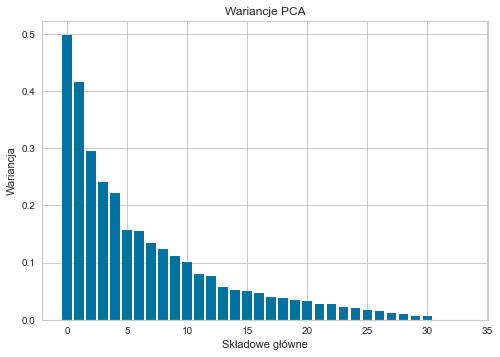

In [16]:
pca = PCA()
pca.fit(df)
variances = pca.explained_variance_
x = np.arange(len(variances))
plt.bar(x, variances)
plt.title('Wariancje PCA')
plt.xlabel('Składowe główne')
plt.ylabel('Wariancja')
plt.show()


In [17]:
pca = PCA(n_components=3)
pca.fit(df)
PCA_ds = pd.DataFrame(pca.transform(df), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,22152.0,1.347183e-17,0.705392,-1.100283,-0.570920,-0.224552,0.667075,1.562608
col2,22152.0,7.425544e-17,0.644601,-1.012303,-0.605372,-0.117278,0.546055,1.264967
col3,22152.0,-2.020774e-17,0.542401,-1.180256,-0.428362,-0.021276,0.411937,1.666148


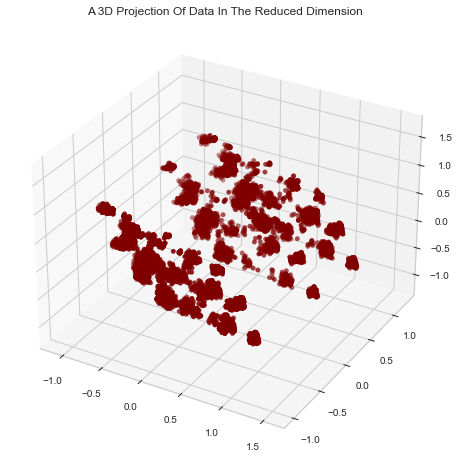

In [11]:
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

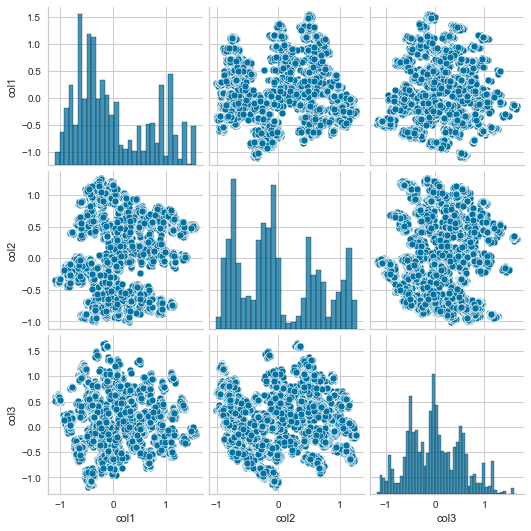

In [12]:
# wykresy zmiennych
df=PCA_ds
sns.pairplot(df)

## Poszukiwanie optymalnej liczby klastrów

In [7]:
def count_clustering_scores(X, cluster_num, model, score_fun):
   
    if isinstance(cluster_num, int):
        cluster_num_iter = [cluster_num]
    else:
        cluster_num_iter = cluster_num
        
    scores = []    
    for k in cluster_num_iter:
        model_instance = model(n_clusters=k)
        labels = model_instance.fit_predict(X)
        wcss = score_fun(X, labels)
        scores.append(wcss)
    
    if isinstance(cluster_num, int):
        return scores[0]
    else:
        return scores

### Kmeans

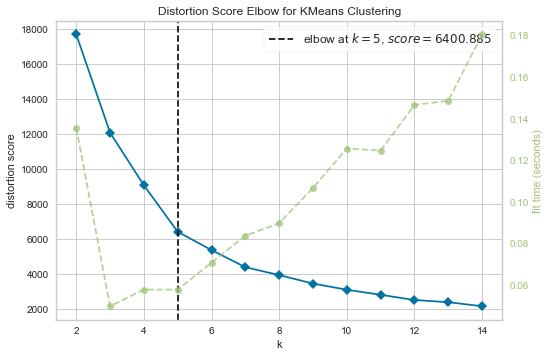

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:
Elbow_M = KElbowVisualizer(KMeans(), k=(2,15))
Elbow_M.fit(df)
Elbow_M.show()

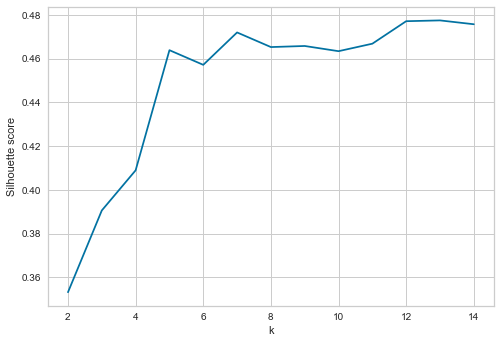

In [10]:
cluster_num_seq = range(2, 15)
silhouette_vec = count_clustering_scores(df, cluster_num_seq, KMeans, silhouette_score)
plt.plot(cluster_num_seq, silhouette_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()

Łokieć wskazuje na 5 klastrów, a silhouette_score na 12

### Kmedoids

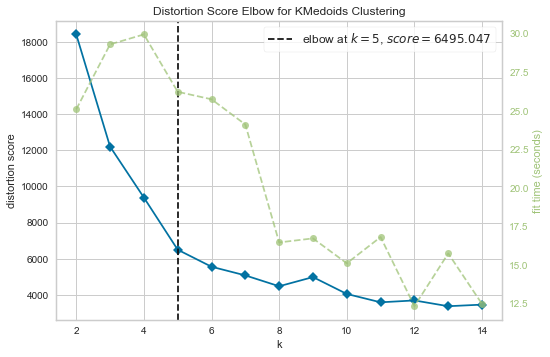

<AxesSubplot:title={'center':'Distortion Score Elbow for KMedoids Clustering'}, xlabel='k', ylabel='distortion score'>

In [11]:
Elbow_M = KElbowVisualizer(KMedoids(), k=(2,15))
Elbow_M.fit(df)
Elbow_M.show()

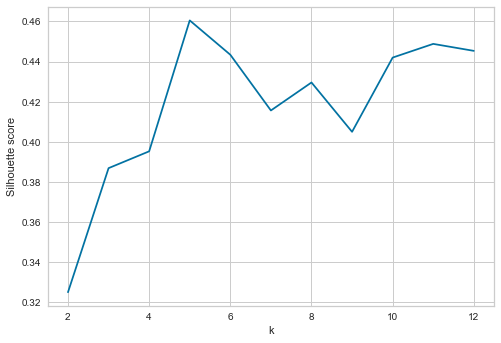

In [9]:
cluster_num_seq = range(2, 13)
silhouette_vec = count_clustering_scores(df, cluster_num_seq, KMedoids, silhouette_score)
plt.plot(cluster_num_seq, silhouette_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()

Łokieć wskazuje na 5 klastrów, a silhouette_score na 5

### AgglomerativeClustering

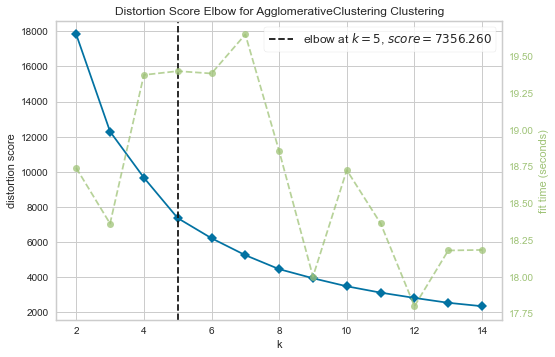

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [14]:
Elbow_M = KElbowVisualizer(AgglomerativeClustering(), k=(2,15))
Elbow_M.fit(df)
Elbow_M.show()

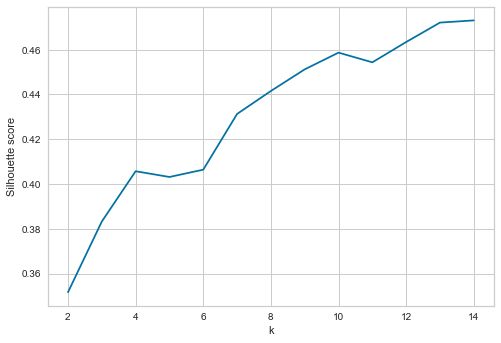

In [13]:
cluster_num_seq = range(2, 15)
silhouette_vec = count_clustering_scores(df, cluster_num_seq, AgglomerativeClustering, silhouette_score)
plt.plot(cluster_num_seq, silhouette_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()

Łokieć wskazuje na 5 klastrów, a silhouette_score na 14

### Gap Statistics

In [15]:
def optimalK(data, nrefs=3, maxClusters=15):
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):
        refDisps = np.zeros(nrefs)
        for i in range(nrefs):
            randomReference = np.random.random_sample(size=data.shape)
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
    return (gaps.argmax() + 1, resultsdf)  

Optimal k is:  19


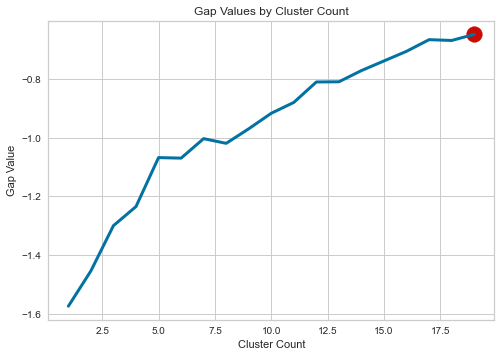

In [16]:
k, gapdf = optimalK(df, nrefs=3, maxClusters=15)
print('Optimal k is: ', k)
# Visualization
plt.plot(gapdf.clusterCount, gapdf.gap, linewidth=3)
plt.scatter(gapdf[gapdf.clusterCount == k].clusterCount, gapdf[gapdf.clusterCount == k].gap, s=250, c='r')
plt.grid(True)
plt.xlabel('Cluster Count')
plt.ylabel('Gap Value')
plt.title('Gap Values by Cluster Count')
plt.show()

### Dendogram

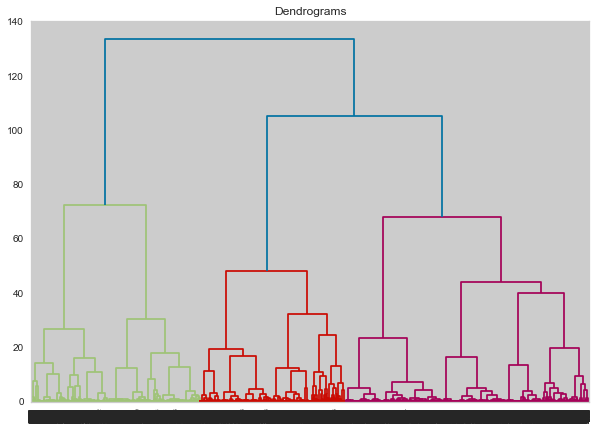

In [17]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(df, method='ward'))

### AIC And BIC From GMMs

In [18]:
aic_score = {} 
bic_score = {}

for i in range(1,15): 
  gmm = GaussianMixture(n_components=i, random_state=0).fit(df)
  aic_score[i] = gmm.aic(df)
  bic_score[i] = gmm.bic(df)


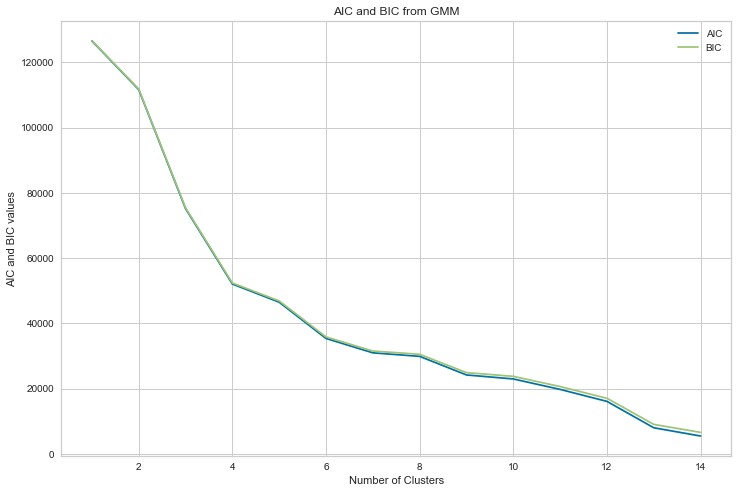

In [19]:
plt.figure(figsize=(12,8))
plt.plot(list(aic_score.keys()),list(aic_score.values()), label='AIC')
plt.plot(list(bic_score.keys()),list(bic_score.values()), label='BIC')
plt.legend(loc='best')
plt.title('AIC and BIC from GMM')
plt.xlabel('Number of Clusters')
plt.ylabel('AIC and BIC values')
plt.show()

In [20]:
results = [6,5,7,7,5]
median = np.median(results)
median

6.0

# Clusterization

### 1. Kmeans

In [18]:
k = 6 
kmeans = KMeans(n_clusters=k)
kmeans.fit(df)
labels = kmeans.labels_

In [35]:
pca = PCA(n_components=3)  
X_pca = pca.fit_transform(df)
labels = kmeans.labels_

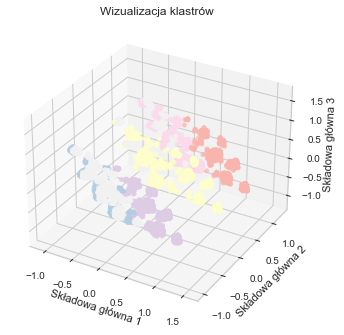

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap='Pastel1')
ax.set_title("Wizualizacja klastrów")
ax.set_xlabel("Składowa główna 1")
ax.set_ylabel("Składowa główna 2")
ax.set_zlabel("Składowa główna 3")
plt.show()

In [19]:
for cluster in range(k):
    cluster_elements = df[labels == cluster]
    cluster_medians = np.median(cluster_elements, axis=0)
    print(f'Klaster {cluster+1}:')
    for column, median in enumerate(cluster_medians):
        column_name = df.columns[column]
        print(f'{column_name}: {median}')
    print('---')

Klaster 1:
age: 0.3506493506493506
default: 0.0
balance: 0.0640188072259341
housing: 1.0
loan: 0.0
day: 0.4666666666666667
month: 0.4545454545454545
duration: 0.1103086014445174
campaign: 0.05
pdays: 0.0
job_admin.: 0.0
job_blue-collar: 1.0
job_entrepreneur: 0.0
job_housemaid: 0.0
job_management: 0.0
job_retired: 0.0
job_self-employed: 0.0
job_services: 0.0
job_student: 0.0
job_technician: 0.0
job_unemployed: 0.0
job_unknown: 0.0
marital_divorced: 0.0
marital_married: 1.0
marital_single: 0.0
education_primary: 1.0
education_secondary: 0.0
education_tertiary: 0.0
education_unknown: 0.0
contact_cellular: 1.0
contact_telephone: 0.0
poutcome_failure: 0.0
poutcome_other: 0.0
poutcome_success: 0.0
---
Klaster 2:
age: 0.3116883116883117
default: 0.0
balance: 0.06619648601831224
housing: 1.0
loan: 0.0
day: 0.5333333333333333
month: 0.5454545454545454
duration: 0.113591595535128
campaign: 0.05
pdays: 0.0
job_admin.: 0.0
job_blue-collar: 0.0
job_entrepreneur: 0.0
job_housemaid: 0.0
job_managemen

In [25]:
importance_scores = np.zeros(df.shape[1])
for i in range(df.shape[0]):
    cluster_center = centroids[labels[i]]
    importance_scores += (df.iloc[i] - cluster_center) ** 2

importance_scores /= df.shape[0]
for i, score in enumerate(importance_scores):
    print(f"Importance score for {df.columns[i]}: {score}")

Współczynnik znaczącości dla zmiennej age: 0.015606778935536702
Współczynnik znaczącości dla zmiennej default: 0.01749290459551298
Współczynnik znaczącości dla zmiennej balance: 0.011617894776406254
Współczynnik znaczącości dla zmiennej housing: 0.2422210049604447
Współczynnik znaczącości dla zmiennej loan: 0.1338659918766376
Współczynnik znaczącości dla zmiennej day: 0.07679710186338996
Współczynnik znaczącości dla zmiennej month: 0.04617012522510411
Współczynnik znaczącości dla zmiennej duration: 0.022222556467966583
Współczynnik znaczącości dla zmiennej campaign: 0.01613202666869328
Współczynnik znaczącości dla zmiennej pdays: 0.054247716502578334
Współczynnik znaczącości dla zmiennej job_admin.: 0.09599006618099802
Współczynnik znaczącości dla zmiennej job_blue-collar: 0.13678020390307466
Współczynnik znaczącości dla zmiennej job_entrepreneur: 0.031173657366380714
Współczynnik znaczącości dla zmiennej job_housemaid: 0.026302936846079806
Współczynnik znaczącości dla zmiennej job_man

### 2. MiniBatchKMeans

In [38]:
miniBatchKmeans = MiniBatchKMeans(n_clusters= 6)
miniBatchKmeans.fit(df)

MiniBatchKMeans(n_clusters=6)

In [40]:
pca = PCA(n_components=3)  
X_pca = pca.fit_transform(df)
labels = miniBatchKmeans.labels_

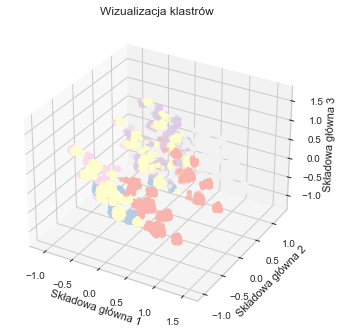

In [42]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap='Pastel1')
ax.set_title("Wizualizacja klastrów")
ax.set_xlabel("Składowa główna 1")
ax.set_ylabel("Składowa główna 2")
ax.set_zlabel("Składowa główna 3")
plt.show()

### 3. Agglomerative Clustering

In [60]:
PCA_ds = pd.DataFrame(pca.transform(df), columns=(["col1","col2", "col3"]))

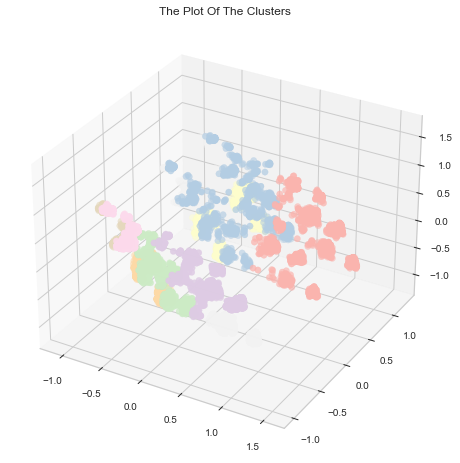

In [61]:
AC = AgglomerativeClustering(5)
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC

fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap='Pastel1')
ax.set_title("The Plot Of The Clusters")
plt.show()

In [32]:
AC = AgglomerativeClustering(5)
AC.fit(df)
result_df = pd.DataFrame(columns=df.columns)
for cluster in range(k):
    cluster_elements = df[labels == cluster]
    cluster_medians = np.median(cluster_elements, axis=0)
    result_df = result_df.append(pd.Series(cluster_medians, name=f'Cluster {cluster+1}'))
    print(f'Klaster {cluster+1}:')
    for column, median in enumerate(cluster_medians):
        column_name = df.columns[column]
        print(f'{column_name}: {median}')
    print('---')

Klaster 1:
age: 0.3376623376623376
default: 0.0
balance: 0.0648354367730759
housing: 1.0
loan: 0.0
day: 0.4666666666666667
month: 0.4545454545454545
duration: 0.1096520026263952
campaign: 0.05
pdays: 0.0
job_admin.: 0.0
job_blue-collar: 1.0
job_entrepreneur: 0.0
job_housemaid: 0.0
job_management: 0.0
job_retired: 0.0
job_self-employed: 0.0
job_services: 0.0
job_student: 0.0
job_technician: 0.0
job_unemployed: 0.0
job_unknown: 0.0
marital_divorced: 0.0
marital_married: 1.0
marital_single: 0.0
education_primary: 1.0
education_secondary: 0.0
education_tertiary: 0.0
education_unknown: 0.0
contact_cellular: 1.0
contact_telephone: 0.0
poutcome_failure: 0.0
poutcome_other: 0.0
poutcome_success: 0.0
---
Klaster 2:
age: 0.2987012987012987
default: 0.0
balance: 0.0665676812670131
housing: 1.0
loan: 0.0
day: 0.5
month: 0.4545454545454545
duration: 0.1122783978988837
campaign: 0.05
pdays: 0.0
job_admin.: 0.0
job_blue-collar: 0.0
job_entrepreneur: 0.0
job_housemaid: 0.0
job_management: 0.0
job_reti

### 4. DBSCAN

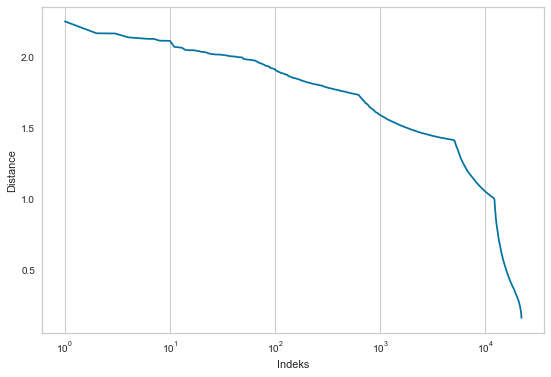

In [47]:
minPts = 68
nbrs = sklearn.neighbors.NearestNeighbors(n_neighbors=minPts).fit(df)
distances, indices = nbrs.kneighbors(df)
distanceDec = sorted(distances[:,minPts-1], reverse=True)
fig = plt.figure(figsize=(9,6))
ax1 = fig.add_subplot(111)

plt.xlabel('Indeks')
plt.ylabel('Distance')
ax1.plot(list(range(1,df.shape[0]+1)), distanceDec)
plt.xscale('log')
plt.grid(axis='y')
plt.show()

In [51]:
dbs = cluster.DBSCAN(eps=0.33, min_samples= minPts)
dbs.fit(X_pca)

DBSCAN(eps=0.33, min_samples=68)

In [53]:
pca = PCA(n_components=3)  
X_pca = pca.fit_transform(df)
labels = dbs.labels_

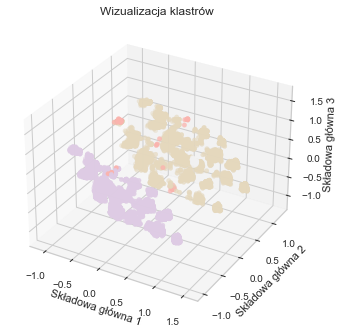

In [55]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap='Pastel1')
ax.set_title("Wizualizacja klastrów")
ax.set_xlabel("Składowa główna 1")
ax.set_ylabel("Składowa główna 2")
ax.set_zlabel("Składowa główna 3")
plt.show()

## Najlepiej wypada Agglomerative Clustering

In [67]:
AC = AgglomerativeClustering(5)
y = AC.fit_predict(df)
labels = AC.labels_

In [97]:
result_df = pd.DataFrame(columns=df.columns)
for cluster in range(5):
    cluster_elements = df[labels == cluster]
    cluster_medians = np.median(cluster_elements, axis=0)
    result_df.loc[cluster]=cluster_medians

In [74]:
result_df.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
0,0.207792,0.0,0.060480,1.0,0.0,0.500000,0.363636,0.116875,0.05,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.298701,0.0,0.066568,1.0,0.0,0.500000,0.454545,0.112278,0.05,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.337662,0.0,0.064835,1.0,0.0,0.466667,0.454545,0.109652,0.05,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.207792,0.0,0.071839,0.0,0.0,0.533333,0.454545,0.115233,0.05,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.285714,0.0,0.073026,0.0,0.0,0.533333,0.545455,0.105712,0.05,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [98]:
n_samples, n_features = df.shape
importance_df = pd.DataFrame(columns=df.columns)
cluster_centers = np.zeros((k, n_features))
for cluster_id in range(k):
    cluster_points = df.iloc[labels == cluster_id]
    cluster_centers[cluster_id] = np.mean(cluster_points, axis=0)

importance_scores = np.zeros(n_features)
for i in range(n_samples):
    cluster_center = cluster_centers[labels[i]]
    importance_scores += (df.iloc[i] - cluster_center) ** 2

importance_scores /= n_samples

for i, score in enumerate(importance_scores):
    print(f"Importance score for {df.columns[i]}: {score}")
importance_df.loc[0]=importance_scores

Importance score for age: 0.016661090011750736
Importance score for default: 0.01749045663780562
Importance score for balance: 0.011620366075872976
Importance score for housing: 0.24399230096101976
Importance score for loan: 0.13392645377013887
Importance score for day: 0.07683229621234901
Importance score for month: 0.04694828875553855
Importance score for duration: 0.022236186975530814
Importance score for campaign: 0.016142080029341872
Importance score for pdays: 0.05568636009255577
Importance score for job_admin.: 0.0967552699645478
Importance score for job_blue-collar: 0.1423888549837302
Importance score for job_entrepreneur: 0.03127599721571671
Importance score for job_housemaid: 0.02644062953802641
Importance score for job_management: 0.11243636486548463
Importance score for job_retired: 0.045517082521895715
Importance score for job_self-employed: 0.03202953757369839
Importance score for job_services: 0.07980203563415077
Importance score for job_student: 0.02023146557586073
Impo

In [77]:
importance_df.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
0,0.017653,0.017499,0.01161,0.244184,0.133963,0.076842,0.046846,0.022228,0.016145,0.054824,...,0.11033,0.044839,0.017351,0.001711,0.031014,0.221126,0.059614,0.093167,0.03827,0.032426


In [99]:
def filter_columns_by_prefix(df, prefix):
    columns_with_prefix = [col for col in df.columns if col.startswith(prefix)]
    return columns_with_prefix

importance_df2 = importance_df
jobs = filter_columns_by_prefix(importance_df2, "job")
marital = filter_columns_by_prefix(importance_df2, "marital")
education = filter_columns_by_prefix(importance_df2, "education")
poutcome = filter_columns_by_prefix(importance_df2, "poutcome")
importance_df2['job'] = importance_df2[jobs].sum(axis=1)
importance_df2['marital'] = importance_df2[marital].sum(axis=1)
importance_df2['education'] = importance_df2[education].sum(axis=1)
importance_df2['poutcome'] = importance_df2[poutcome].sum(axis=1)
importance_df2 = importance_df2.drop(jobs, axis = 'columns')
importance_df2 = importance_df2.drop(marital, axis = 'columns')
importance_df2 = importance_df2.drop(education, axis = 'columns')
importance_df2 = importance_df2.drop(poutcome, axis = 'columns')
importance_df2.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,contact_cellular,contact_telephone,job,marital,education,poutcome
0,0.016661,0.01749,0.01162,0.243992,0.133926,0.076832,0.046948,0.022236,0.016142,0.055686,0.221668,0.059489,0.7581,0.222224,0.105497,0.164837


### Jobs zdecydowanie najbardziej wpływają na klastry zatem zmniejszamy ich wagę

In [89]:
weights = {name: 0.7 for name in jobs}

df_scaled = df.copy()
for column, weight in weights.items():
    df_scaled[column] *= weight

In [92]:
AC = AgglomerativeClustering(5)
y = AC.fit_predict(df_scaled)
labels = AC.labels_

In [100]:
result_df = pd.DataFrame(columns=df_scaled.columns)
for cluster in range(5):
    cluster_elements = df_scaled[labels == cluster]
    cluster_medians = np.median(cluster_elements, axis=0)
    result_df.loc[cluster]=cluster_medians
result_df.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
0,0.233766,0.0,0.073200,0.0,0.0,0.533333,0.545455,0.111622,0.05,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.298701,0.0,0.066568,1.0,0.0,0.500000,0.454545,0.112278,0.05,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.350649,0.0,0.065479,1.0,0.0,0.466667,0.454545,0.110965,0.05,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.337662,0.0,0.061643,1.0,0.0,0.533333,0.454545,0.110965,0.05,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.181818,0.0,0.061272,1.0,0.0,0.500000,0.363636,0.118188,0.05,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [101]:
n_samples, n_features = df_scaled.shape
importance_df = pd.DataFrame(columns=df_scaled.columns)
cluster_centers = np.zeros((k, n_features))
for cluster_id in range(k):
    cluster_points = df_scaled.iloc[labels == cluster_id]
    cluster_centers[cluster_id] = np.mean(cluster_points, axis=0)

importance_scores = np.zeros(n_features)
for i in range(n_samples):
    cluster_center = cluster_centers[labels[i]]
    importance_scores += (df_scaled.iloc[i] - cluster_center) ** 2

importance_scores /= n_samples

for i, score in enumerate(importance_scores):
    print(f"Importance score for {df_scaled.columns[i]}: {score}")
importance_df.loc[0]=importance_scores

importance_df.head()

Importance score for age: 0.016661090011750736
Importance score for default: 0.01749045663780562
Importance score for balance: 0.011620366075872976
Importance score for housing: 0.24399230096101976
Importance score for loan: 0.13392645377013887
Importance score for day: 0.07683229621234901
Importance score for month: 0.04694828875553855
Importance score for duration: 0.022236186975530814
Importance score for campaign: 0.016142080029341872
Importance score for pdays: 0.05568636009255577
Importance score for job_admin.: 0.04741008228265486
Importance score for job_blue-collar: 0.06977053894202602
Importance score for job_entrepreneur: 0.015325238635705837
Importance score for job_housemaid: 0.012955908473635327
Importance score for job_management: 0.05509381878408417
Importance score for job_retired: 0.022303370435730357
Importance score for job_self-employed: 0.015694473411109827
Importance score for job_services: 0.039102997460731606
Importance score for job_student: 0.0099134181321668

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
0,0.016661,0.01749,0.01162,0.243992,0.133926,0.076832,0.046948,0.022236,0.016142,0.055686,...,0.095389,0.031293,0.021455,0.021455,0.031293,0.221668,0.059489,0.094142,0.038226,0.032468


In [96]:
def filter_columns_by_prefix(df, prefix):
    columns_with_prefix = [col for col in df.columns if col.startswith(prefix)]
    return columns_with_prefix

importance_df2 = importance_df
jobs = filter_columns_by_prefix(importance_df2, "job")
marital = filter_columns_by_prefix(importance_df2, "marital")
education = filter_columns_by_prefix(importance_df2, "education")
poutcome = filter_columns_by_prefix(importance_df2, "poutcome")
importance_df2['job'] = importance_df2[jobs].sum(axis=1)
importance_df2['marital'] = importance_df2[marital].sum(axis=1)
importance_df2['education'] = importance_df2[education].sum(axis=1)
importance_df2['poutcome'] = importance_df2[poutcome].sum(axis=1)
importance_df2 = importance_df2.drop(jobs, axis = 'columns')
importance_df2 = importance_df2.drop(marital, axis = 'columns')
importance_df2 = importance_df2.drop(education, axis = 'columns')
importance_df2 = importance_df2.drop(poutcome, axis = 'columns')
importance_df2.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,contact_cellular,contact_telephone,job,marital,education,poutcome
0,0.016661,0.01749,0.01162,0.243992,0.133926,0.076832,0.046948,0.022236,0.016142,0.055686,0.221668,0.059489,0.7581,0.222224,0.105497,0.164837
